分析结果：
```
    测试和优化方案：
    测试周期：  2013.1~2023.1（10年）
    测试窗口    2年、3年、5年
    滚动窗口    3个月滚动一次，每年4个滚动
    测试数量：  8x4+7x4+5x4= 32+28+20 = 80个测试（ 剩余年数 * 年移动4次）
```

In [8]:
import pandas as pd

# df = pd.read_csv("../debug/510310,510500,159915,588090_20130101_20230101_2,3,5_3.csv")
#df = pd.read_csv("../debug/510500_20130101_20230101_2,3,5_3.csv")
df = pd.read_csv("../debug/510330,510500,159915,588090,512880,512200,512660,512010,512800,512690,510810,512980,512760,159928,515000,516160,512580_20130101_20230101_2,3,5_3.csv")
df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益"]]
plus = df1[df['组合收益']>0]
minus = df1[df['组合收益']<0]
good = df1[df['组合收益']>df['基金收益']]
bad = df1[df['组合收益']<df['基金收益']]

print(f"一共测试了{len(df1)}个场景")
print(f"平均年化：{df['组合年化'].mean()}")
print(f"年化方差：{df['组合年化'].std()}")
print(f"最大年化：{df['组合年化'].max()}")
print(f"最小年化：{df['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df1)}")
print(f"强于基金比例：{len(good)/len(df1)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了1082个场景
平均年化：0.10397951808967394
年化方差：0.09609814655934908
最大年化：0.3443369554939981
最小年化：-0.0520231564029495
负收益比例：0.1044362292051756
强于基金比例：0.6876155268022182
比基金差的情况：
        基金代码      投资起始      投资结束      组合年化      组合收益      基准收益      基金收益
0     510330  20130104  20141231  0.119213  0.252637  0.420592  0.435250
1     510500  20130104  20141231  0.119213  0.252637  0.420592  0.491800
2     159915  20130104  20141231  0.119213  0.252637  0.420592  1.022107
10    510330  20130104  20151231  0.145397  0.502687  0.554323  0.560685
11    510500  20130104  20151231  0.145397  0.502687  0.554323  1.201300
...      ...       ...       ...       ...       ...       ...       ...
1060  512760  20171009  20220930  0.106458  0.658341 -0.103719  0.861200
1061  159928  20171009  20220930  0.106458  0.658341 -0.103719  1.059803
1074  512690  20180102  20221231  0.113930  0.715102 -0.042223  1.404000
1077  512760  20180102  20221231  0.113930  0.715102 -0.042223  0.868200
1078  159928  20180102  2

(array([ 12.,  36.,  53.,  24.,  24.,  89., 101.,  64.,  69.,  76.,  16.,
         48., 119.,  49.,   5.,  42.,   0.,  42.,  22.,   0.,   5.,  37.,
         22.,  34.,  39.,   5.,   0.,  17.,  16.,  16.]),
 array([-0.05202316, -0.03881115, -0.02559915, -0.01238715,  0.00082486,
         0.01403686,  0.02724887,  0.04046087,  0.05367287,  0.06688488,
         0.08009688,  0.09330888,  0.10652089,  0.11973289,  0.1329449 ,
         0.1461569 ,  0.1593689 ,  0.17258091,  0.18579291,  0.19900491,
         0.21221692,  0.22542892,  0.23864093,  0.25185293,  0.26506493,
         0.27827694,  0.29148894,  0.30470094,  0.31791295,  0.33112495,
         0.34433696]),
 <a list of 30 Patch objects>)

/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/software/py3/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


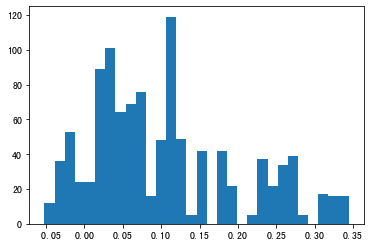

In [9]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)